<a href="https://colab.research.google.com/github/Flychuban/Customer-Churn-Prediction/blob/main/CustomerChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/drive/MyDrive/CustomerChurnPrediction/data/customer_churn_data.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.drop("customerID", axis='columns', inplace=True)

In [5]:
# Convert string of 'TotalCharges' to numeric value
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]
df = df[df.TotalCharges != " "]
df.TotalCharges = pd.to_numeric(df.TotalCharges)

<ipython-input-5-55cbaf357a09>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.TotalCharges = pd.to_numeric(df.TotalCharges)


Tenure is important because it shows how loyar are the customers. I will plot it with histogram

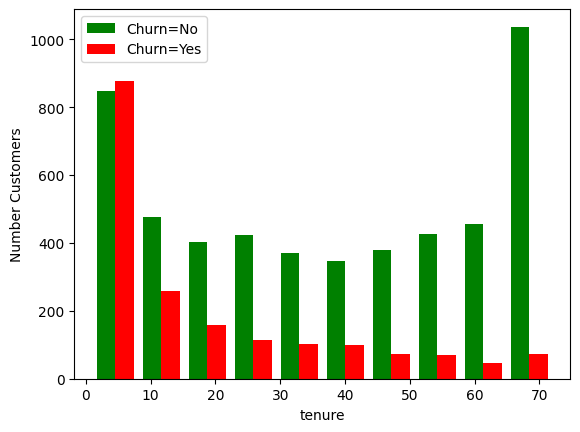

In [6]:
tenure_churn_no = df[df.Churn == 'No'].tenure
tenure_churn_yes = df[df.Churn == 'Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Customers")
plt.hist([tenure_churn_no, tenure_churn_yes], color=["green", "red"], label=["Churn=No", "Churn=Yes"])
plt.legend()

In [7]:
def print_unique_values(df):
  for column in df:
    if df[column].dtype == "object":
      print(f"{column} : {df[column].unique()}")

In [8]:
print_unique_values(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


We have to replace 'No phone service' and 'No internet service' with 'No'

In [9]:
df.replace('No phone service', 'No', inplace=True)
df.replace( 'No internet service', 'No', inplace=True)

In [10]:
print_unique_values(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


Encode 'Yes' = 1 and 'No' = 0

In [11]:
yes_no_columns = [df[column].name for column in df if df[column].unique().any() == "Yes" or df[column].unique().any() == "No"]

for column in yes_no_columns:
  df[column].replace({'Yes': 1, 'No': 0}, inplace=True)

In [12]:
for column in df:
  print(f"{column} : {df[column].unique()}")

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [13]:
df['gender'].replace({'Male': 0, 'Female': 1}, inplace=True)
df['gender'].unique()

array([1, 0])

One Hot encoding for categorical columns

In [14]:
df = pd.get_dummies(data=df, columns=['InternetService', 'Contract', 'PaymentMethod'])
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4314,0,1,0,0,24,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1335,0,0,0,0,2,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2227,0,0,1,1,58,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1818,0,0,1,1,60,1,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0
3737,1,0,0,0,5,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1


In [15]:
# Now we can see that all values are numeric
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

Scale all values from 0 to 1

In [16]:
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = MinMaxScaler()

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [17]:
df.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6209,0,0,0,0,0.394366,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
5063,0,0,0,0,0.281690,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
5461,1,0,0,0,0.859155,1,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1


Train Test split

In [18]:
X = df.drop('Churn', axis='columns')
y = df['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=10)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, stratify=y_test, random_state=10)

Create Neural Network

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [21]:
nn_model = Sequential()

nn_model.add(Dense(26, activation='relu', input_shape=(26,)))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dropout(0.4))
nn_model.add(Dense(16, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

In [22]:
nn_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = nn_model.fit(X_train, y_train, batch_size=16, validation_data=(X_val, y_val), epochs=30)

Epoch 1/30
330/330 [==============================] - 9s 5ms/step - loss: 0.5078 - accuracy: 0.7359 - val_loss: 0.4285 - val_accuracy: 0.7861
Epoch 2/30
330/330 [==============================] - 1s 4ms/step - loss: 0.4409 - accuracy: 0.7916 - val_loss: 0.4231 - val_accuracy: 0.7861
Epoch 3/30
330/330 [==============================] - 1s 4ms/step - loss: 0.4354 - accuracy: 0.7905 - val_loss: 0.4210 - val_accuracy: 0.7873
Epoch 4/30
330/330 [==============================] - 2s 5ms/step - loss: 0.4299 - accuracy: 0.7979 - val_loss: 0.4225 - val_accuracy: 0.7918
Epoch 5/30
330/330 [==============================] - 3s 8ms/step - loss: 0.4266 - accuracy: 0.7945 - val_loss: 0.4208 - val_accuracy: 0.7941
Epoch 6/30
330/330 [==============================] - 5s 14ms/step - loss: 0.4216 - accuracy: 0.8081 - val_loss: 0.4223 - val_accuracy: 0.7998
Epoch 7/30
330/330 [==============================] - 3s 8ms/step - loss: 0.4231 - accuracy: 0.8028 - val_loss: 0.4244 - val_accuracy: 0.7907
Epoch

In [ ]:
# Save the model
nn_model.save("customer_churn_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
nn_model = tf.keras.models.load_model("/content/drive/MyDrive/CustomerChurnPrediction/customer_churn_model.h5")

In [25]:
# Neural Network model predictions
nn_predictions = nn_model.predict(X_test)

28/28 [==============================] - 0s 2ms/step


In [26]:
# NN Model testing
nn_model.evaluate(X_test, y_test)

28/28 [==============================] - 1s 4ms/step - loss: 0.4341 - accuracy: 0.7918


[0.434095561504364, 0.7918089032173157]

Now let's compare the results to SVM model

In [27]:
from sklearn import svm
from sklearn.metrics import accuracy_score
import pickle

In [28]:
svm_classifier = svm.SVC(kernel='linear')

In [29]:
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [31]:
svm_predictions = svm_classifier.predict(X_test)
acc = accuracy_score(y_test, svm_predictions)
print(f"Accuracy of SVM model: {acc}")

Accuracy of SVM model: 0.7963594994311718


So the results are similar with Neural Network Model.
Let's try Random Forest model

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [33]:
# Random Forest hyperparameters
n_estimators = [int(x) for x in np.linspace(start=10, stop=80, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [2, 4]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
bootstrap = [True, False]

In [34]:
param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}
param_grid

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [2, 4],
 'min_samples_split': [2, 5],
 'min_samples_leaf': [1, 2],
 'bootstrap': [True, False]}

In [35]:
rf_model = RandomForestClassifier()

In [37]:
rf_RandomGrid = RandomizedSearchCV(estimator = rf_model, param_distributions = param_grid, cv = 10, verbose=2, n_jobs=4)

In [39]:
rf_RandomGrid.fit(X_train, y_train)
rf_RandomGrid

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 17, 25, 33, 41, 48,
                                                         56, 64, 72, 80]},
                   verbose=2)

In [40]:
print(f"Test accuracy of Random Forest model: {rf_RandomGrid.score(X_test, y_test)}")

Test accuracy of Random Forest model: 0.7815699658703071


So we can see that Neural Network model is the best performing.

In [41]:
# Transform predictions in scale 0 - 1
y_pred = []
for pred in nn_predictions:
  if pred > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

print(y_pred)

[0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 

In [42]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       646
           1       0.66      0.45      0.53       233

    accuracy                           0.79       879
   macro avg       0.74      0.68      0.70       879
weighted avg       0.78      0.79      0.78       879



Text(95.72222222222221, 0.5, 'Truth')

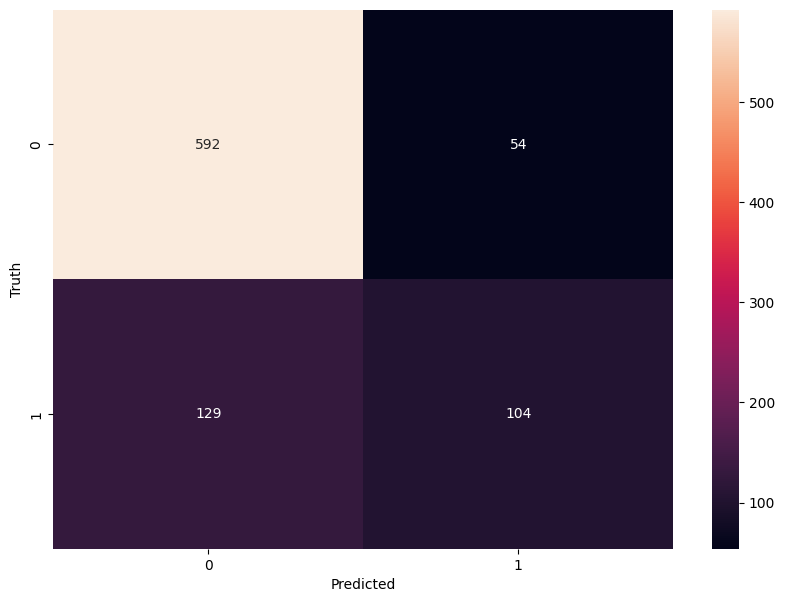

In [43]:
import seaborn as sn

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")